# Hypothesis Testing

1. Creating A Sample Distribution from our Control and Experimental groups

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
file_name = "https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/drug_trial.csv"
df = pd.read_csv(file_name)
df.head()

,group,mean_duration
0,Control,7
1,Control,5
2,Control,4
3,Control,5
4,Control,8


In [3]:
df['group'].unique()

array(['Control', 'Experimental'], dtype=object)

In [4]:
df['group'].value_counts()

Control         40
Experimental    40
Name: group, dtype: int64

In [6]:
df.shape

(80, 2)

In [7]:
df.isnull().sum()

group            0
mean_duration    0
dtype: int64

In [10]:
control_mean = df[df['group'] == 'Control'].mean()
experiment_mean = df[df['group'] == 'Experimental'].mean()

print("Control Mean = ", str(control_mean))
print("Experimental Mean = " + str(experiment_mean))

Control Mean =  mean_duration    5.4
dtype: float64
Experimental Mean = mean_duration    4.8
dtype: float64


C:\Users\SOURAB~1\AppData\Local\Temp/ipykernel_16524/2417974352.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  control_mean = df[df['group'] == 'Control'].mean()
C:\Users\SOURAB~1\AppData\Local\Temp/ipykernel_16524/2417974352.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  experiment_mean = df[df['group'] == 'Experimental'].mean()


# Let's run 10,000 Permutations

Mean Difference Mean - -0.00026624145361917327


c:\Users\Sourabh Singh\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

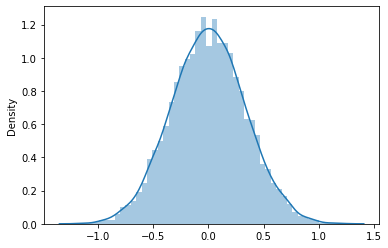

In [13]:
mean_difference = control_mean - experiment_mean
data_points = list(df['mean_duration'])
mean_differences = []
number_of_iterations = 10000

for i in range(number_of_iterations):
    group_1 = []
    group_2 = []

    for data_point in data_points:
        random_assignment = np.random.randint(0,2) == True
        if random_assignment:
            group_1.append(data_point)
        else: 
            group_2.append(data_point)
    
    trial_mean_difference = np.mean(group_2) - np.mean(group_1)
    mean_differences.append(trial_mean_difference)

print("Mean Difference Mean - " + str(np.array(mean_differences).mean()))

sns.distplot(mean_differences)

## How many values exceed the mean difference of 0.6

In [15]:
mean_differences = pd.DataFrame(mean_differences)

exceeds_mean_diff = len(mean_differences[mean_differences[0] >= 0.6])
print(exceeds_mean_diff)

385


## Calculating the P-Value

In [16]:
p_value = exceeds_mean_diff / number_of_iterations
print(p_value)

0.0385
